# VGG-16 Model

### <u>Action Classes - 15</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import vgg16

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-25 17:33:47.689083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 17:33:47.717502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 17:33:47.717753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<img src='https://miro.medium.com/max/1400/1*NNifzsJ7tD2kAfBXt3AzEg.png'>

## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)


In [4]:
image_size = (224,224)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 3767 images belonging to 15 classes.
Found 934 images belonging to 15 classes.
Found 934 images belonging to 15 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Archery': 1,
 'BabyCrawling': 2,
 'Biking': 3,
 'Diving': 4,
 'Fencing': 5,
 'Kayaking': 6,
 'MilitaryParade': 7,
 'PizzaTossing': 8,
 'ShavingBeard': 9,
 'SkateBoarding': 10,
 'SumoWrestling': 11,
 'TennisSwing': 12,
 'Typing': 13,
 'WritingOnBoard': 14}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

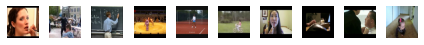

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

## Initialize Model

In [8]:
vggmodeltop = vgg16.VGG16(include_top=True,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(vggmodeltop.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape))

2022-08-25 17:33:48.451468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 17:33:48.451975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 17:33:48.452250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 17:33:48.452522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 224, 224, 3)])
(1, 'block1_conv1', (None, 224, 224, 64))
(2, 'block1_conv2', (None, 224, 224, 64))
(3, 'block1_pool', (None, 112, 112, 64))
(4, 'block2_conv1', (None, 112, 112, 128))
(5, 'block2_conv2', (None, 112, 112, 128))
(6, 'block2_pool', (None, 56, 56, 128))
(7, 'block3_conv1', (None, 56, 56, 256))
(8, 'block3_conv2', (None, 56, 56, 256))
(9, 'block3_conv3', (None, 56, 56, 256))
(10, 'block3_pool', (None, 28, 28, 256))
(11, 'block4_conv1', (None, 28, 28, 512))
(12, 'block4_conv2', (None, 28, 28, 512))
(13, 'block4_conv3', (None, 28, 28, 512))
(14, 'block4_pool', (None, 14, 14, 512))
(15, 'block5_conv1', (None, 14, 14, 512))
(16, 'block5_conv2', (None, 14, 14, 512))
(17, 'block5_conv3', (None, 14, 14, 512))
(18, 'block5_pool', (None, 7, 7, 512))
(19, 'flatten', (None, 25088))
(20, 'fc1', (None, 4096))
(21, 'fc2', (None, 4096))
(22, 'predictions', (None, 1000))


In [9]:
vggmodel = vgg16.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for (i,layer) in enumerate(vggmodel.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape))

(0, 'input_2', [(None, 224, 224, 3)])
(1, 'block1_conv1', (None, 224, 224, 64))
(2, 'block1_conv2', (None, 224, 224, 64))
(3, 'block1_pool', (None, 112, 112, 64))
(4, 'block2_conv1', (None, 112, 112, 128))
(5, 'block2_conv2', (None, 112, 112, 128))
(6, 'block2_pool', (None, 56, 56, 128))
(7, 'block3_conv1', (None, 56, 56, 256))
(8, 'block3_conv2', (None, 56, 56, 256))
(9, 'block3_conv3', (None, 56, 56, 256))
(10, 'block3_pool', (None, 28, 28, 256))
(11, 'block4_conv1', (None, 28, 28, 512))
(12, 'block4_conv2', (None, 28, 28, 512))
(13, 'block4_conv3', (None, 28, 28, 512))
(14, 'block4_pool', (None, 14, 14, 512))
(15, 'block5_conv1', (None, 14, 14, 512))
(16, 'block5_conv2', (None, 14, 14, 512))
(17, 'block5_conv3', (None, 14, 14, 512))
(18, 'block5_pool', (None, 7, 7, 512))
(19, 'global_average_pooling2d', (None, 512))


In [10]:
model = models.Sequential()

dense_layer_1 = Dense(32, activation='relu')
dense_layer_2 = Dense(32, activation='relu')
prediction_layer = Dense(15, activation='softmax')

model.add(vggmodel)
model.add(dense_layer_1)
model.add(dense_layer_2)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 14,732,655
Trainable params: 17,967
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-15-model-vgg16.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-25 17:33:52.383352: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-25 17:33:52.797291: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-25 17:33:53.014079: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


377/377 [==============================] - 71s 180ms/step - loss: 2.0605 - accuracy: 0.3770 - val_loss: 1.4728 - val_accuracy: 0.5728
Epoch 2/20
377/377 [==============================] - 67s 177ms/step - loss: 1.0353 - accuracy: 0.7075 - val_loss: 0.9628 - val_accuracy: 0.6938
Epoch 3/20
377/377 [==============================] - 69s 183ms/step - loss: 0.6941 - accuracy: 0.8025 - val_loss: 0.8382 - val_accuracy: 0.7152
Epoch 4/20
377/377 [==============================] - 79s 209ms/step - loss: 0.5286 - accuracy: 0.8439 - val_loss: 0.7389 - val_accuracy: 0.7484
Epoch 5/20
377/377 [==============================] - 108s 286ms/step - loss: 0.4212 - accuracy: 0.8832 - val_loss: 0.6552 - val_accuracy: 0.7741
Epoch 6/20
377/377 [==============================] - 110s 291ms/step - loss: 0.3491 - accuracy: 0.9005 - val_loss: 0.6646 - val_accuracy: 0.7655
Epoch 7/20
377/377 [==============================] - 111s 293ms/step - loss: 0.2894 - accuracy: 0.9196 - val_loss: 0.6429 - val_accuracy: 

In [14]:
model.save("./models/action-class-15-trained-vgg16.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-15-trained-vgg16.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 14,732,655
Trainable params: 17,967
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

94/94 [==============================] - 26s 233ms/step - loss: 0.7463 - accuracy: 0.7837


[0.746271014213562, 0.783725917339325]

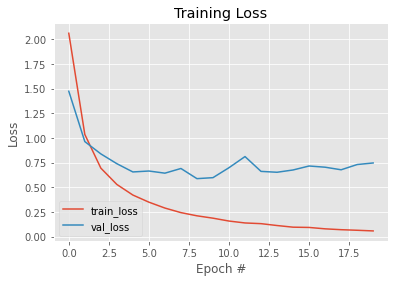

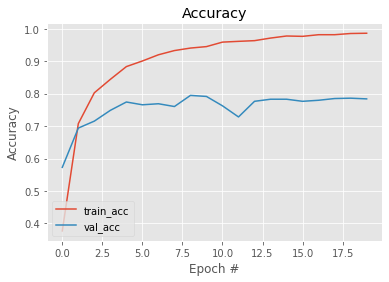

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()